### Summary

In this project, we'll demonstrate our data science skills by predicting house prices in various locations within Bangalore, India. We're using a dataset from Kaggle, which you can find here: [Kaggle Dataset](https://www.kaggle.com/datasets/nithinthuruthipally/bengaluru-house-prices).

In this notebook, we'll use Python to perform a range of tasks including data importation, cleaning, wrangling, and other manipulations to prepare a well-structured dataset. Then, we'll apply machine learning techniques to find the best model for predicting house prices.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib

In [2]:
#Data importation
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

We will now drop all columns that do not influence the house price. In other words, any column that doesn't impact the price will be removed. Specifically, the columns for availability, society, area type, and balcony do not contribute significantly to our price prediction. Therefore, we will use the following code to remove these columns:

In [4]:
dataframe = df.drop(columns =["availability", "area_type","balcony", "society"])
#Print the 3 first rows
dataframe.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [5]:
dataframe.isnull().sum() #Alway check for missing values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
#Dealing with missing values
dataframe = dataframe.dropna()

#Double checking missing values
dataframe.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
dataframe.shape

(13246, 5)

We will analyze each column to understand its contents and characteristics. The dataset contains 13,246 observations, but we will initially examine the first 3 to 5 rows for a quick overview. Additionally, the `.unique()` method is a useful tool for identifying all unique values in a column.

In [8]:
dataframe['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

We create the bedroom column from spliting the seze column and keeping the first element, wich is the integer or number which represent the numbe of bedroom

In [9]:
dataframe['bedroom'] = dataframe['size'].apply(lambda x: x.split(' ')[0])

In [10]:
dataframe['bedroom'] = dataframe['bedroom'].apply(lambda x: int(x))

In [11]:
#drop the old size column
dataframe.drop(columns='size', inplace=True)

In [12]:
dataframe.head()

,location,total_sqft,bath,price,bedroom
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [13]:
#Here we double checking, and we see that we only have the number of bedroom for each observation
dataframe['bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
dataframe[dataframe.bedroom>20]

,location,total_sqft,bath,price,bedroom
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [15]:
dataframe.shape

(13246, 5)

In [16]:
#Now we check the column 'total_sqft'
dataframe['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

The data format in this column is quite messy, with numbers having incorrect data types and some values presented as intervals. To address this, we will create a function to separate the numbers from the intervals.

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [37]:
# We are identifying all values in the data that cannot be converted to float.
dataframe[~ dataframe['total_sqft'].apply(lambda x: is_float(x))].head(3)

,location,total_sqft,bath,price,bedroom
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2


In [21]:
dataframe.shape

(13246, 5)

We will create a function that returns the average of the minimum and maximum values of an interval.

In [27]:
def convert_total_sqft_to_number(x):
    value = x.split('-')
    if len(value) == 2:
        return (float(value[0]) + float(value[1]))/2
    try:
        return float(x)
    except:
        return None

In [33]:
dataframe1 = dataframe.copy()
dataframe1['total_sqft'] = dataframe1['total_sqft'].apply(convert_total_sqft_to_number)
dataframe1.head(3)

,location,total_sqft,bath,price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


In [39]:
# We do have missing values as result of the apply function convert_total_sqft_to_number
# We are going to drop all missing values
dataframe1.total_sqft.isnull().sum()
dataframe1.dropna(inplace=True)

In [41]:
# Quick verification to make sure we do not have any missing values :)
dataframe1.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bedroom       0
dtype: int64

Let's create a new column, "price_per_sqft," in our DataFrame to evaluate the price of the house per square foot.

In [43]:
dataframe1['price_per_sqft'] = dataframe1['price']*100000/dataframe1['total_sqft']
dataframe1.head(3)

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556


In [52]:
# Now let's take a look of the column "location"
dataframe1['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'Other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [45]:
len(dataframe1['location'].unique())

1298

In [46]:
dataframe1.location = dataframe1.location.apply(lambda x: x.strip())
loc_stats = dataframe1.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [47]:
len(loc_stats[loc_stats<=10])

1047

In [53]:
# We will group all locations that have fewer than 10 occurrences in the dataset.
location_less_than_10 = loc_stats[loc_stats<=10]
location_less_than_10.size

1047

In [49]:
len(dataframe1.location.unique())

1287

In [50]:
dataframe1.location = dataframe1.location.apply(lambda x: 'Other' if x in location_less_than_10 else x)

In [51]:
len(dataframe1.location.unique())

241

In [58]:
# We can see on the 9th row that they are now some location categorize as "Other"
dataframe1.head(10)

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Other,1020.0,6.0,370.00,6,36274.509804


Generally speaking, there is a realistic correlation between the size of a house and the number of rooms and bathrooms it has. In other words, smaller houses typically have fewer rooms and bathrooms. For this analysis, we will assume our project manager has provided the following threshold: the total square feet divided by the number of bedrooms must be less than 300.

In [60]:
# Create a new dataframe that only take in consideration houses that meet the criteria 
dataframe2 = dataframe1[~(dataframe1.total_sqft/dataframe1.bedroom<300)]
dataframe2.head(3)

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556


In [64]:
dataframe2['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [67]:
# Dealing with outliers
def removal_outliers (df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reducedf = subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<=(m+sd))]
        df_out = pd.concat([df_out, reducedf], ignore_index=True )
    return df_out

dataframe3 = removal_outliers(dataframe2)

In [68]:
dataframe3.shape

(10242, 6)

In [69]:
dataframe3.head(3)

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333


Here we are going to do some basic visualization with matplotlib

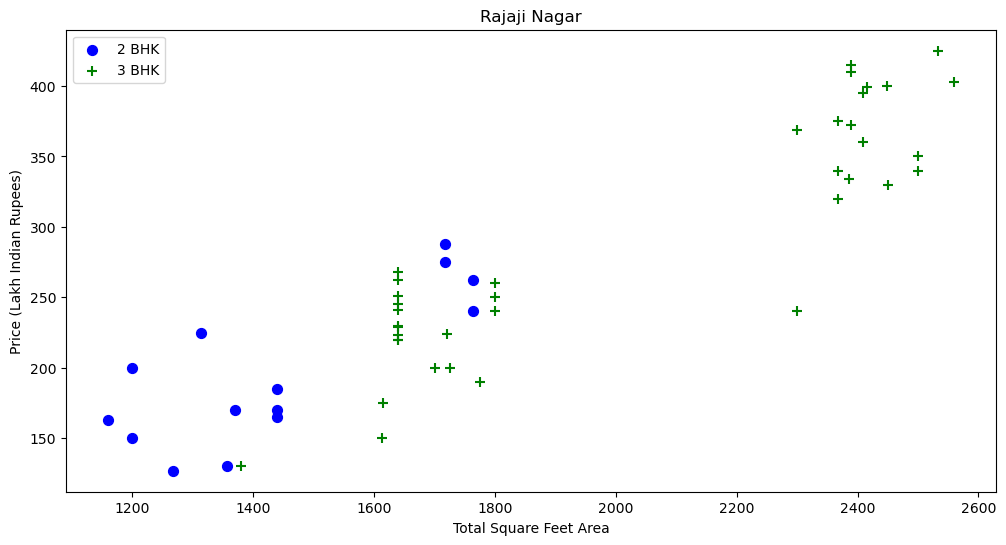

In [82]:
def plot_scatter_chart(df,location):
    bedroom2 = df[(df.location==location) & (df.bedroom==2)]
    bedroom3 = df[(df.location==location) & (df.bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (12,6)
    plt.scatter(bedroom2.total_sqft,bedroom2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bedroom3.total_sqft,bedroom3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(dataframe3,"Rajaji Nagar")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

In [85]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
dataframe4 = remove_bedroom_outliers(dataframe3)
dataframe4.shape

(7317, 6)

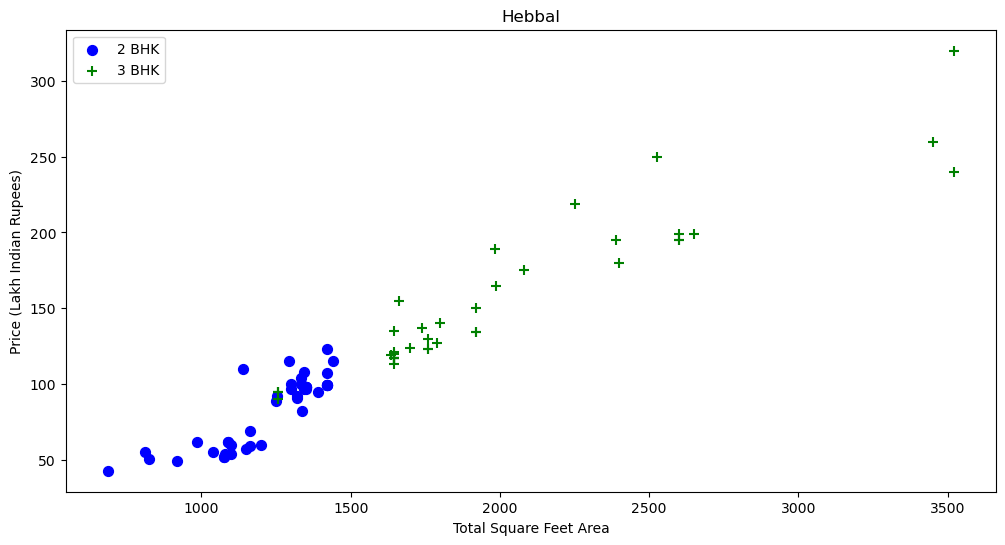

In [86]:
plot_scatter_chart(dataframe4,"Hebbal")

Text(0, 0.5, 'Count')

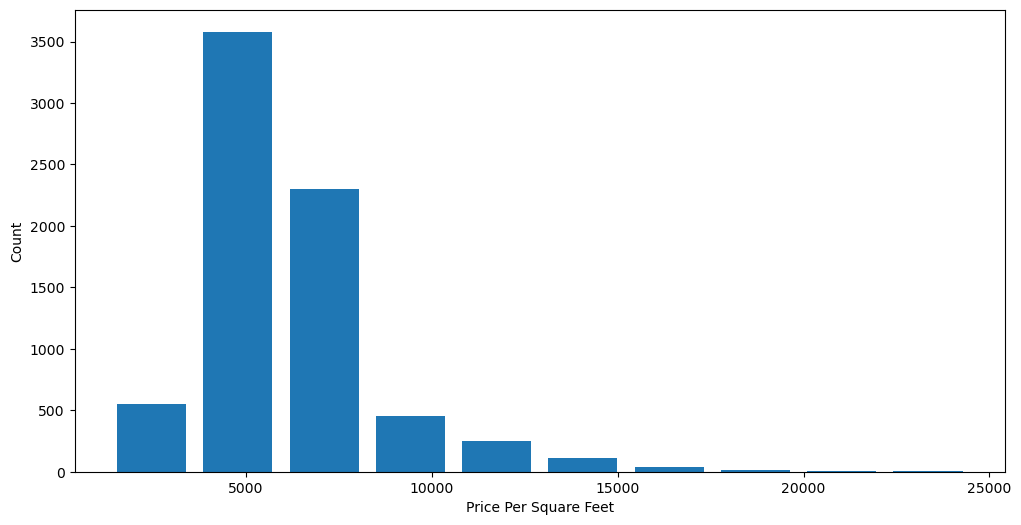

In [88]:
#import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,6)
plt.hist(dataframe4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
dataframe4.bath.unique()

In [89]:
dataframe4[dataframe4.bath>10]

,location,total_sqft,bath,price,bedroom,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
5926,Other,12000.0,12.0,525.0,10,4375.000000
6015,Other,10000.0,16.0,550.0,16,5500.000000
6749,Other,6000.0,12.0,150.0,11,2500.000000
7080,Other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

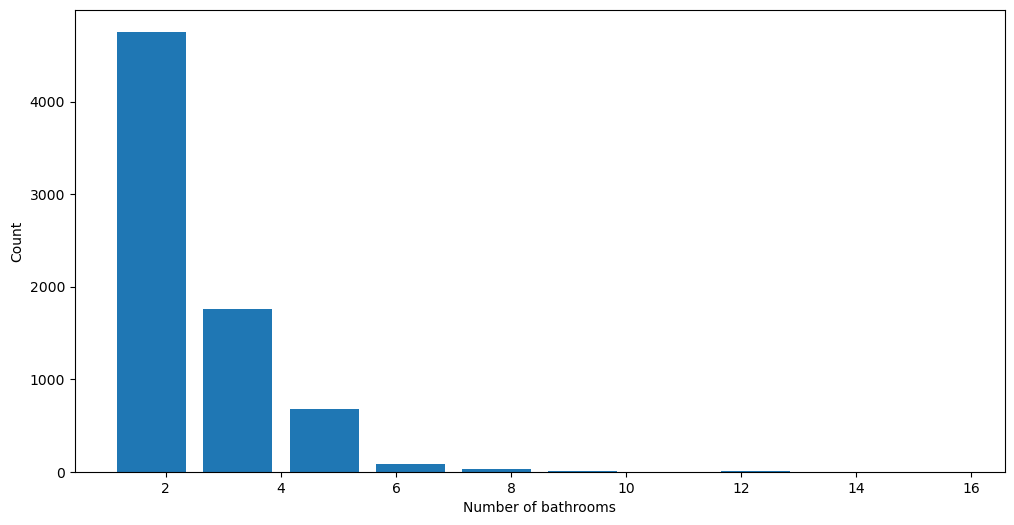

In [90]:
plt.hist(dataframe4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [91]:
dataframe5 = dataframe4[dataframe4.bath<dataframe4.bedroom+2]
dataframe5.shape

(7239, 6)

In [92]:
dataframe5.head(3)

,location,total_sqft,bath,price,bedroom,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333


In [93]:
dataframe6 = dataframe5.drop('price_per_sqft', axis=1)

In [94]:
dummies = pd.get_dummies(dataframe6.location, dtype=int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
dataframe7 = pd.concat([dataframe6, dummies], axis='columns').drop(columns=['location','Other'], axis=1)
dataframe7.head(3)

,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = dataframe7.drop('price', axis='columns')
y = dataframe7.price

In [102]:
X.shape

(7239, 243)

In [103]:
y.shape

(7239,)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [105]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8697077447864586

##### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [106]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85828778, 0.84336113, 0.79796392, 0.83935442, 0.87210932])

##### Find best model using GridSearchCV

In [107]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]

            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.842253,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.709923,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.658281,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


##### linear_regression has a better score 

##### Test the model for few properties

In [108]:
def predict_price(location,sqft,bath,bedroom):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [109]:
predict_price('Neeladri Nagar', 1000,2,2)

C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.98019477932843

In [110]:
predict_price('Neeladri Nagar', 1000,3,3)

C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.98118018242218

In [111]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.97216916101226

In [112]:
predict_price('1st Phase JP Nagar',1000, 3,3)

C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.97315456410601

In [113]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\kerry\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.54832393547207

##### Export the tested model to a pickle file

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))